# INCOMPLETE NOTEBOOK

In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import time
from tqdm.notebook import tqdm
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# time.sleep(1000)

In [3]:
def get_metrics(y_pred, y_test, to_print=True):
    correct_labels = np.where(y_pred==y_test)[0]
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred,average='macro')
    recall = metrics.recall_score(y_test, y_pred,average='macro')
    f1score = metrics.f1_score(y_test, y_pred,average='macro')
    # rocscore = metrics.roc_auc_score(y_test, y_pred,average='micro',multi_class="ovo")
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  
    classification_report = metrics.classification_report(y_test, y_pred)

    if to_print:
        print("Identified {} correct labels out of {} labels".format(len(correct_labels), y_test.shape[0]))
        print("Accuracy:",accuracy)
        print("Precision:",precision)
        print("Recall:",recall)
        print("F1 Score:",f1score)
        # print("ROC AUC Score:",rocscore)
        print("Confusion Matrix:\n", confusion_matrix)
        print("Classification_Report:\n", classification_report)

#     return (correct_labels, accuracy, precision, recall, confusion_matrix, classification_report)

In [11]:
def rfcfit(fname,objday,verbose=False):
    
    
    df = pd.read_csv(f"subset_saved_fits/{objday}_days/{fname}.csv")
    avgtime = df.dropna()['timetaken'].mean()
    failedobjs = len(df) - len(df.dropna())
    
    if verbose:
        print("*****************")
        print(fname)
        print(f"There are {failedobjs} objects for whom at least 1 passband's fit failed.")
        print(f"Average time taken for 1 full object is {avgtime} seconds per object for all 6 passbands")
    df = df.fillna(0)
    X = df[df.columns[3:]].values
    y = df["objclass"].values
    
    rfc = RandomForestClassifier(n_estimators=200,random_state=42)
    preds = cross_val_predict(rfc, X, y, cv=10)
    
    get_metrics(preds,y, to_print=verbose)
    f1score = metrics.f1_score(preds,y,average='macro')
    
    return avgtime, f1score, failedobjs

In [12]:
# templs = glob.glob("subset_saved_fits/*/*.csv")
# templs = list(set([t.split("/")[-1].split(".csv")[0] for t in templs]))
# templs

In [13]:
allparams = ["oldbazin","bazin","fred",
             "karpenka","villar","alercev1","alercev2"]
paramname = ["Bazin - old implementation","Bazin - new implementation","FRED",
             "Karpenka","Villar","Alercev1", "Alercev2"]
columnname = ["Parameterisation Used","Average Time per Object for all 6 passbands (s)",
              "Average F1 Score for RFC (n=150)", "Total objects (of 480) where fit failed (for ≥ 1 passband)"]

In [14]:
directoryls = glob.glob("subset_csv_data/*_days")

obsdaylist = []
for directory in directoryls:
    obsdaylist.append(int(directory.split("/")[-1].split("_")[0]))

In [15]:
directoryls

['subset_csv_data/24_days',
 'subset_csv_data/179_days',
 'subset_csv_data/108_days',
 'subset_csv_data/37_days',
 'subset_csv_data/77_days',
 'subset_csv_data/64_days',
 'subset_csv_data/95_days',
 'subset_csv_data/83_days',
 'subset_csv_data/85_days',
 'subset_csv_data/59_days',
 'subset_csv_data/42_days',
 'subset_csv_data/111_days',
 'subset_csv_data/53_days']

In [16]:
summarylist = []
for obsday in tqdm(obsdaylist):
    print(f"******************* OBSDAY = {obsday} *******************")
    for i, param in enumerate(allparams):
        res = list(rfcfit(param,obsday))
        summarylist.append([f"{obsday}_days_{paramname[i]}"]+res)

  0%|          | 0/13 [00:00<?, ?it/s]

******************* OBSDAY = 24 *******************


/home/sidchaini/resspect_work/.venvs/newresspect/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sidchaini/resspect_work/.venvs/newresspect/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sidchaini/resspect_work/.venvs/newresspect/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

******************* OBSDAY = 179 *******************
******************* OBSDAY = 108 *******************
******************* OBSDAY = 37 *******************


/home/sidchaini/resspect_work/.venvs/newresspect/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sidchaini/resspect_work/.venvs/newresspect/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sidchaini/resspect_work/.venvs/newresspect/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

******************* OBSDAY = 77 *******************
******************* OBSDAY = 64 *******************
******************* OBSDAY = 95 *******************
******************* OBSDAY = 83 *******************
******************* OBSDAY = 85 *******************
******************* OBSDAY = 59 *******************
******************* OBSDAY = 42 *******************
******************* OBSDAY = 111 *******************
******************* OBSDAY = 53 *******************


# SUMMARY

In [17]:
summarydf = pd.DataFrame(data=summarylist,columns=columnname) 
summarydf.style.set_properties(align="right")

,Parameterisation Used,Average Time per Object for all 6 passbands (s),Average F1 Score for RFC (n=150),Total objects (of 480) where fit failed (for ≥ 1 passband)
0,24_days_Bazin - old implementation,nan,0.086453,480
1,24_days_Bazin - new implementation,0.053552,0.185094,398
2,24_days_FRED,0.038216,0.196414,465
3,24_days_Karpenka,0.066763,0.165333,398
4,24_days_Villar,0.092925,0.197464,316
5,24_days_Alercev1,0.038815,0.196626,316
6,24_days_Alercev2,nan,0.075397,480
7,179_days_Bazin - old implementation,0.018039,0.266700,0
8,179_days_Bazin - new implementation,0.084814,0.276341,17
9,179_days_FRED,0.092136,0.253189,142


<!-- |Parameterisation Used| Average Time per Object for all   6 passbands (s) | Average F1 Score for RFC (n=150) | Total objects (of 480) where fit failed   (for ≥ 1 passband) |   |
|:----------------------:|:---------------------------------------------------:|:----------------:|:------------------------------------------------------:|---|
| Bazin                  | 0.0309                                              | 0.56 ± 0.02      | 11                                                     |   |
| FRED                   | 0.0452                                              | 0.47 ± 0.02      | 54                                                    |   |
| Alerce: Sid Guesses    | 0.0789                                              | 0.47 ± 0.02      | 10                                                     |   |
| Alerce: Alerce Guesses | 0.0947                                              | 0.47 ± 0.02      | 10                                                     |   |
| Alerce: Using R        | 0.0952                                              | 0.45 ± 0.02      | 13                                                     |   |
| Villar                 | 0.0375                                              | 0.50 ± 0.02      | 0                                                      |   | -->

In [18]:
timedict = {}
for k in paramname:
    timedict[k] = []

In [19]:
for obsday in sorted(obsdaylist):
    for k in paramname:
        timedict[k].append(summarydf[summarydf["Parameterisation Used"]==f"{obsday}_days_{k}"]["Average F1 Score for RFC (n=150)"].to_numpy()[0])

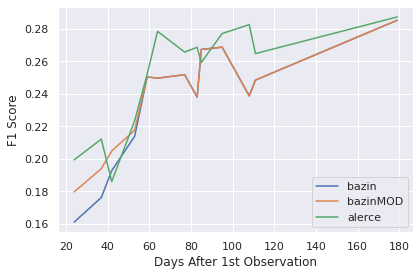

In [147]:
x = sorted(obsdaylist)
y1 = bazinls
y2 = bazinmodls
y3 = alercels

fig, ax1 = plt.subplots()
ax1.plot(x,y1,label="bazin")
ax1.plot(x,y2,label="bazinMOD")
ax1.plot(x,y3,label="alerce")
ax1.set_xlabel("Days After 1st Observation")
ax1.set_ylabel("F1 Score")
ax1.legend()

# ax2 = ax1.twinx()
# ax2.plot(list(range(3,16)),y1)
# ax2.set_xlabel("Number of points")

fig.tight_layout()
plt.show()

# Compare early fit and full fit

In [48]:
bazinfeatures = ["a", "b", "t0", "tfall", "trise"]
alercev1features = ["a", "beta", "t0", "gamma", "t_fall", "t_rise"]

def upperfn(time,a,beta,t0,t1,tfall,trise):
    val = (a*(1 - beta*(time-t0)/(t1-t0)))/(1+np.exp(-(time-t0)/trise))
    return val
def lowerfn(time,a,beta,t0,t1,tfall,trise):
    val = (a*(1-beta)*np.exp(-(time-t1)/tfall))/(1+np.exp(-(time-t0)/trise))
    return val
def alercev1(time,a,beta,t0,gamma,tfall,trise):
    t1 = t0 + gamma
    val = np.piecewise(time, [time < t1, time >= t1], [lambda time: upperfn(time,a,beta,t0,t1,tfall,trise), lambda time: lowerfn(time,a,beta,t0,t1,tfall,trise)])
    return val

def bazin(time, a, b, t0, tfall, trise):
    with np.errstate(over='ignore', invalid='ignore'):
        X = np.exp(-(time - t0) / tfall) / (1 + np.exp(-(time - t0) / trise))
        return a * X + b

In [117]:
for obsday in sorted(obsdaylist):
    bazinmse =
    bazinfullfitdf = pd.read_csv("saved_fits/bazin.csv",index_col=0)
    bazinearlyfitdf = pd.read_csv(f"subset_saved_fits/{obsday}_days/bazin.csv",index_col=0)
    
    alercev1fullfitdf = pd.read_csv("saved_fits/alercev1.csv",index_col=0)
    alercev1earlyfitdf = pd.read_csv(f"subset_saved_fits/{obsday}_days/alercev1.csv",index_col=0)

    allobjs = bazinfullfitdf.index.to_numpy()
    for obj in allobjs:
        bfull = bazin(x,*(bazinfullfitdf[[f"{elem}_{band}" for elem in bazinfeatures]].loc[obj].to_numpy()))
        bearly = bazin(x,*(bazinearlyfitdf[[f"{elem}_{band}" for elem in bazinfeatures]].loc[obj].to_numpy()))
        
        
        break

In [142]:
tempbdf = pd.DataFrame(np.concatenate([bfull.reshape(-1,1),bearly.reshape(-1,1)],axis=1))

In [145]:
tempbdf.corr().iloc[0,1]

-0.01013253743636269

In [123]:
((bfull - bearly)**2).sum()

2405780.186206553

In [54]:
allobjs = bazinfullfitdf.index.to_numpy()

In [104]:
x = np.arange(0,800,0.01)

In [105]:
for obj in allobjs:
    

In [43]:
fullfit_params_bazin = bazinfullfitdf[[f"{elem}_{band}" for elem in bazinfeatures]].loc[obj].to_numpy()
earlyfit_params_bazin = bazinearlyfitdf[[f"{elem}_{band}" for elem in bazinfeatures]].loc[obj].to_numpy()

fullfit_params_alercev1 = alercev1fullfitdf[[f"{elem}_{band}" for elem in alercev1features]].loc[obj].to_numpy()
earlyfit_params_alercev1 = alercev1earlyfitdf[[f"{elem}_{band}" for elem in alercev1features]].loc[obj].to_numpy()


NameError: name 'obj' is not defined